In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import sqrt,log,exp

In [2]:
a=np.zeros((512,512,3))
b=np.array(pd.read_csv("C:\\Users\\Nam Le\\file2.txt", sep=" ", header=None))

In [3]:
for i in b:
    a[i[1],i[0]]=i[2:5]

In [4]:
def not_four_points(i,j):
    return not ((i in [0,255]) and (j in [0,255]))
def dis(i,j):
    return sqrt((i[0]-j[0])**2+(i[1]-j[1])**2)

In [5]:
print(not_four_points(0,0))
h=[[0,0],[255,0],[0,255],[255,255]]

False


In [6]:
r=np.zeros((512,512,4))
t=0
s=np.array([a[0,0],a[0,255],a[255,0],a[255,255]])
s=np.transpose(s)

In [7]:
for i in range(512):
    for j in range(512):
        if not_four_points(i,j):
            r[i,j]=[dis([i,j],h[0]),dis([i,j],h[1]),dis([i,j],h[2]),dis([i,j],h[3])]
            mnpq = (1/(1+r[i,j]**2))
            t=sum(mnpq)
            a[j,i]=(s@mnpq)/t

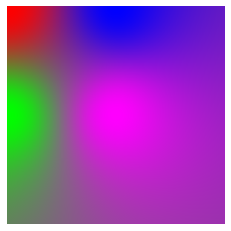

In [8]:
a=a.astype("uint8")
plt.axis("off")
plt.imshow(a)
plt.show()

In [9]:
for i in range(512):
    for j in range(512):
        if not_four_points(i,j):
            r[i,j]=[dis([i,j],h[0]),dis([i,j],h[1]),dis([i,j],h[2]),dis([i,j],h[3])]
            mnpq = sqrt(1+r[i,j]**2)
            t=sum(mnpq)
            a[j,i]=(s@mnpq)/t

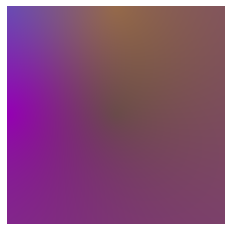

In [10]:
plt.imshow(a)
plt.axis("off")
plt.show()

In [11]:
for i in range(512):
    for j in range(512):
        if not_four_points(i,j):
            r[i,j]=[dis([i,j],h[0]),dis([i,j],h[1]),dis([i,j],h[2]),dis([i,j],h[3])]
            mnpq = r[i,j]**2*log(r[i,j])
            t=sum(mnpq)
            a[j,i]=(s@mnpq)/t

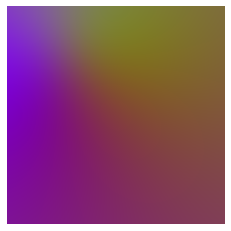

In [12]:
plt.imshow(a)
plt.axis("off")
plt.show()

In [13]:
for i in range(512):
    for j in range(512):
        if not_four_points(i,j):
            r[i,j]=[dis([i,j],h[0]),dis([i,j],h[1]),dis([i,j],h[2]),dis([i,j],h[3])]
            mnpq = exp(-1/1000*r[i,j]**2)
            t=sum(mnpq)
            a[j,i]=(s@mnpq)/t

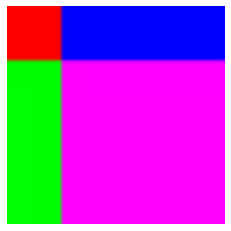

In [14]:
plt.imshow(a)
plt.axis("off")
plt.show()